## Observations and Insights 

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how = 'outer', on = 'Mouse ID')
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [26]:
# Checking the number of mice in the DataFrame.
combined_data.groupby("Mouse ID").count()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,10,10,10,10,10,10,10
a251,10,10,10,10,10,10,10
a262,10,10,10,10,10,10,10
a275,10,10,10,10,10,10,10
a366,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...
z435,3,3,3,3,3,3,3
z578,10,10,10,10,10,10,10
z581,10,10,10,10,10,10,10


In [27]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [28]:
# Optional: Get all the data for the duplicate mouse ID. 


In [30]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_data.drop_duplicates(subset=["Mouse ID", "Timepoint"], inplace=True)
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1888 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1888 non-null   object 
 1   Drug Regimen        1888 non-null   object 
 2   Sex                 1888 non-null   object 
 3   Age_months          1888 non-null   int64  
 4   Weight (g)          1888 non-null   int64  
 5   Timepoint           1888 non-null   int64  
 6   Tumor Volume (mm3)  1888 non-null   float64
 7   Metastatic Sites    1888 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.8+ KB


In [ ]:
# Checking the number of mice in the clean DataFrame.


## Summary Statistics

In [288]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

#MEAN
tumor_mean = combined_data.groupby("Drug Regimen").mean()
tumor_mean = tumor_mean["Tumor Volume (mm3)"]
tumor_mean = tumor_mean.reset_index()
tumor_mean = pd.DataFrame(tumor_mean)
tumor_mean.rename(columns = {"Tumor Volume (mm3)" : "Tumor Volume MEAN (mm3)"}, inplace = True)

#MEDIAN
tumor_med = combined_data.groupby("Drug Regimen").median()
tumor_med = tumor_med["Tumor Volume (mm3)"]
tumor_med = tumor_med.reset_index()
tumor_med = pd.DataFrame(tumor_med)
tumor_med.rename(columns = {"Tumor Volume (mm3)" : "Tumor Volume MED ( mm3)"}, inplace = True)

#VARIANCE
tumor_var = combined_data.groupby("Drug Regimen").var()
tumor_var = tumor_var["Tumor Volume (mm3)"]
tumor_var = tumor_var.reset_index()
tumor_var = pd.DataFrame(tumor_var)
tumor_var.rename(columns = {"Tumor Volume (mm3)" : "Tumor Volume VAR (mm3)"}, inplace = True)

#STANDARD DEVIATION
tumor_std = combined_data.groupby("Drug Regimen").std()
tumor_std = tumor_std["Tumor Volume (mm3)"]
tumor_std = tumor_std.reset_index()
tumor_std = pd.DataFrame(tumor_std)
tumor_std.rename(columns = {"Tumor Volume (mm3)" : "Tumor Volume STD (mm3)"}, inplace = True)

#SEM
tumor_sem = combined_data.groupby("Drug Regimen").sem()
tumor_sem = tumor_sem["Tumor Volume (mm3)"]
tumor_sem = tumor_sem.reset_index()
tumor_sem = pd.DataFrame(tumor_sem)
tumor_sem.rename(columns = {"Tumor Volume (mm3)" : "Tumor Volume SEM (mm3)"}, inplace = True)

#Merge them all to one table
stat_sum = pd.merge(tumor_mean, tumor_med, how = 'outer', on = ['Drug Regimen'])
stat_sum = pd.merge(stat_sum, tumor_var, how = 'outer', on = ['Drug Regimen'])
stat_sum = pd.merge(stat_sum, tumor_std, how = 'outer', on = ['Drug Regimen'])
stat_sum = pd.merge(stat_sum, tumor_sem, how = 'outer', on = ['Drug Regimen'])
stat_sum.head()

,Drug Regimen,Tumor Volume MEAN (mm3),Tumor Volume MED ( mm3),Tumor Volume VAR (mm3),Tumor Volume STD (mm3),Tumor Volume SEM (mm3)
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar Plots

<BarContainer object of 100 artists>

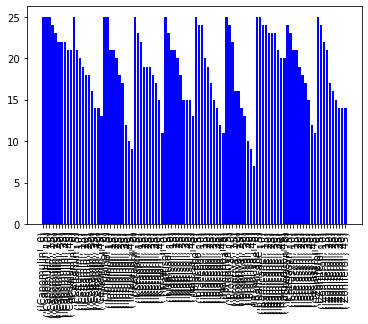

In [102]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using PYPLOT. 
#timepoints for x axis

bar_counts = combined_data.groupby(["Drug Regimen", "Timepoint"]).count()["Mouse ID"]
bary = list(bar_counts)
drug_time = list(bar_counts.keys())
barx = [str(item) for item in drug_time]
plt.xticks(rotation = 90)
plt.bar(barx, bary, color = "b", align = "center")


#---- CLEAN AND LABEL---------

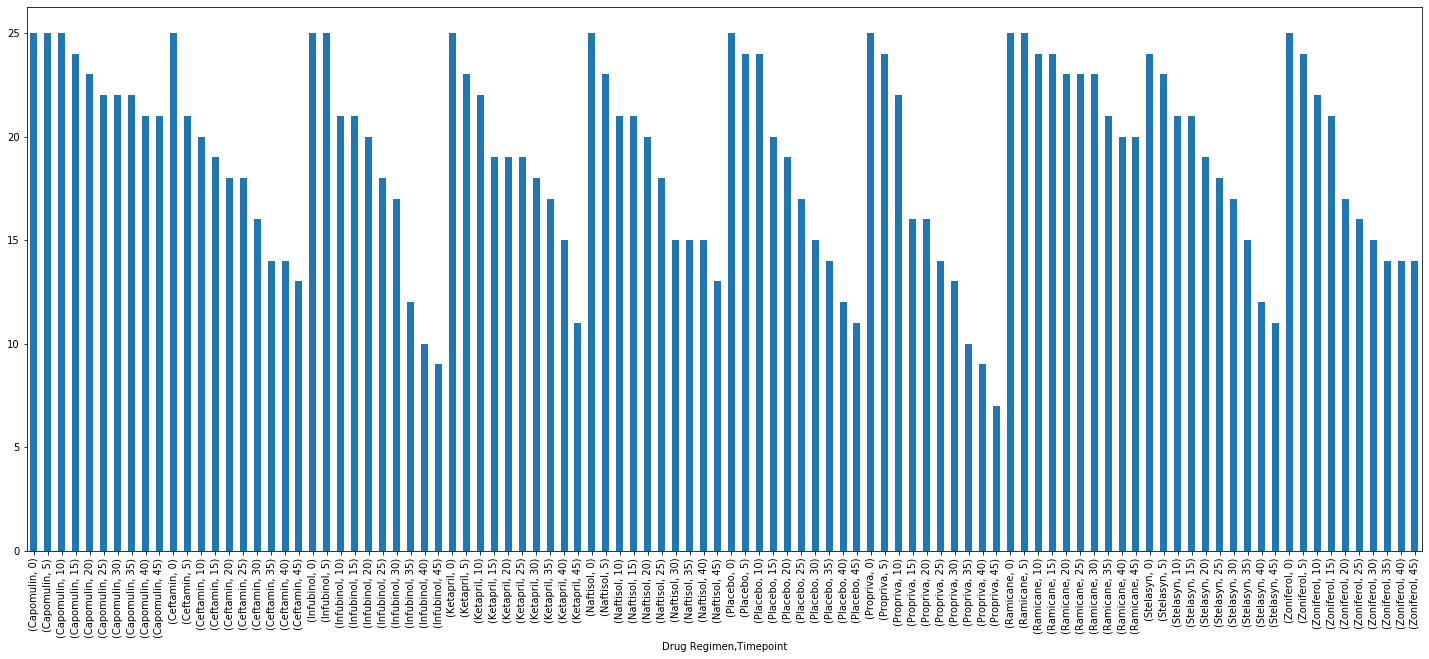

In [96]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using PANDAS.
bar_counts.plot(kind="bar", figsize=(25,10))
#----------LABEL-----------

## Pie Plots

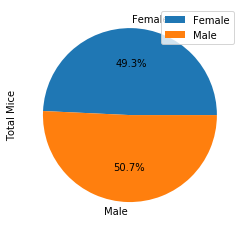

In [285]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

pie_data = combined_data.groupby("Sex").count()["Mouse ID"].reset_index()
pie_data.rename(columns = {"Mouse ID":"Total Mice"}, inplace=True)
pie_data.plot(kind = "pie", y="Total Mice", labels = pie_data["Sex"], autopct="%1.1f%%")



([<matplotlib.patches.Wedge at 0x12c291f7160>,
 [Text(0.02562299800632446, 1.099701533132135, 'Female'),
  Text(-0.025623100967812958, -1.099701530733132, 'Male')],
 [Text(0.01397618073072243, 0.5998371998902553, '49.3%'),
  Text(-0.01397623689153434, -0.5998371985817083, '50.7%')])

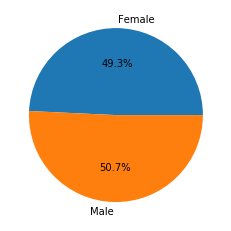

In [286]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(pie_data["Total Mice"], labels = pie_data["Sex"], autopct="%1.1f%%")

## Quartiles, Outliers and Boxplots

In [259]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
cap = combined_data.loc[(combined_data["Drug Regimen"] == "Capomulin") & (combined_data["Timepoint"] == 45), ["Drug Regimen", "Tumor Volume (mm3)"]]
ram = combined_data.loc[(combined_data["Drug Regimen"] == "Ramicane") & (combined_data["Timepoint"] == 45), ["Drug Regimen", "Tumor Volume (mm3)"]]
inf = combined_data.loc[(combined_data["Drug Regimen"] == "Infubinol") & (combined_data["Timepoint"] == 45), ["Drug Regimen", "Tumor Volume (mm3)"]]
cef = combined_data.loc[(combined_data["Drug Regimen"] == "Ceftamin") & (combined_data["Timepoint"] == 45), ["Drug Regimen", "Tumor Volume (mm3)"]]


drug_list = [cap, ram, inf, cef]

for drug in drug_list:
    quartiles = drug["Tumor Volume (mm3)"].quantile([.25, .5, .75])
    upper_quar = quartiles[.75]
    lower_quar = quartiles[.25]
    iqr = upper_quar - lower_quar
    box_max = upper_quar + (1.5*iqr)
    box_min = lower_quar - (1.5*iqr)
    name = drug["Drug Regimen"].unique()[0]
    outliers = drug.loc[(drug["Tumor Volume (mm3)"] > box_max) | (drug["Tumor Volume (mm3)"] < box_min)]
    print(f"Outliers for {name}: {outliers}")



Outliers for Capomulin: Empty DataFrame
Columns: [Drug Regimen, Tumor Volume (mm3)]
Index: []
Outliers for Ramicane: Empty DataFrame
Columns: [Drug Regimen, Tumor Volume (mm3)]
Index: []
Outliers for Infubinol: Empty DataFrame
Columns: [Drug Regimen, Tumor Volume (mm3)]
Index: []
Outliers for Ceftamin: Empty DataFrame
Columns: [Drug Regimen, Tumor Volume (mm3)]
Index: []


Text(0, 0.5, 'Tumor Volume')

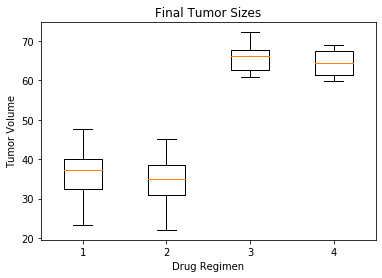

In [283]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

other_drug_list = [cap["Tumor Volume (mm3)"], ram["Tumor Volume (mm3)"], inf["Tumor Volume (mm3)"], cef["Tumor Volume (mm3)"]]
plt.boxplot(other_drug_list)
plt.title('Final Tumor Sizes')
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume")

## Line and Scatter Plots

Text(0.5, 1.0, 'Tumor Volume over Time for Capomulin Mice')

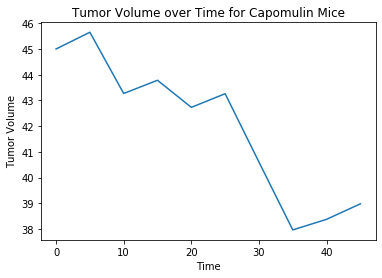

In [280]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_df = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin"]
line_df = cap_df.groupby("Mouse ID").count()
line_df = line_df.loc[line_df["Timepoint"] == 10]
line_df.reset_index(inplace = True)
mouse = line_df["Mouse ID"][0]
mouse_df = combined_data.loc[combined_data["Mouse ID"] == mouse]
plt.plot(mouse_df["Timepoint"], mouse_df["Tumor Volume (mm3)"])    
plt.xlabel("Time")
plt.ylabel("Tumor Volume")
plt.title('Tumor Volume over Time for Capomulin Mice')

Text(0.5, 1.0, 'Mouse Weight vs. Average Tumor Volume for Capomulin')

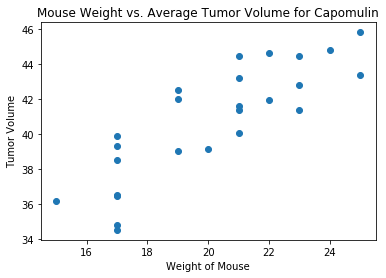

In [281]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_mice = cap_df.groupby("Mouse ID").mean()
weight = cap_mice["Weight (g)"]
avg_vol = cap_mice["Tumor Volume (mm3)"]
plt.scatter(weight, avg_vol)
plt.xlabel("Weight of Mouse")
plt.ylabel("Tumor Volume")
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin')

## Correlation and Regression

Correlation coefficient: 0.8419363424694718


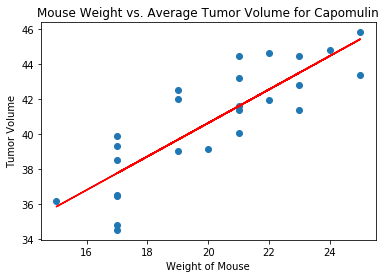

In [282]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, avg_vol)
regress_values = weight * slope + intercept
plt.scatter(weight, avg_vol)
plt.plot(weight,regress_values,"r-")
plt.xlabel("Weight of Mouse")
plt.ylabel("Tumor Volume")
plt.title('Tumor Volume over Time for Capomulin Mice')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin')
print(f"Correlation coefficient: {rvalue}")